In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

In [2]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

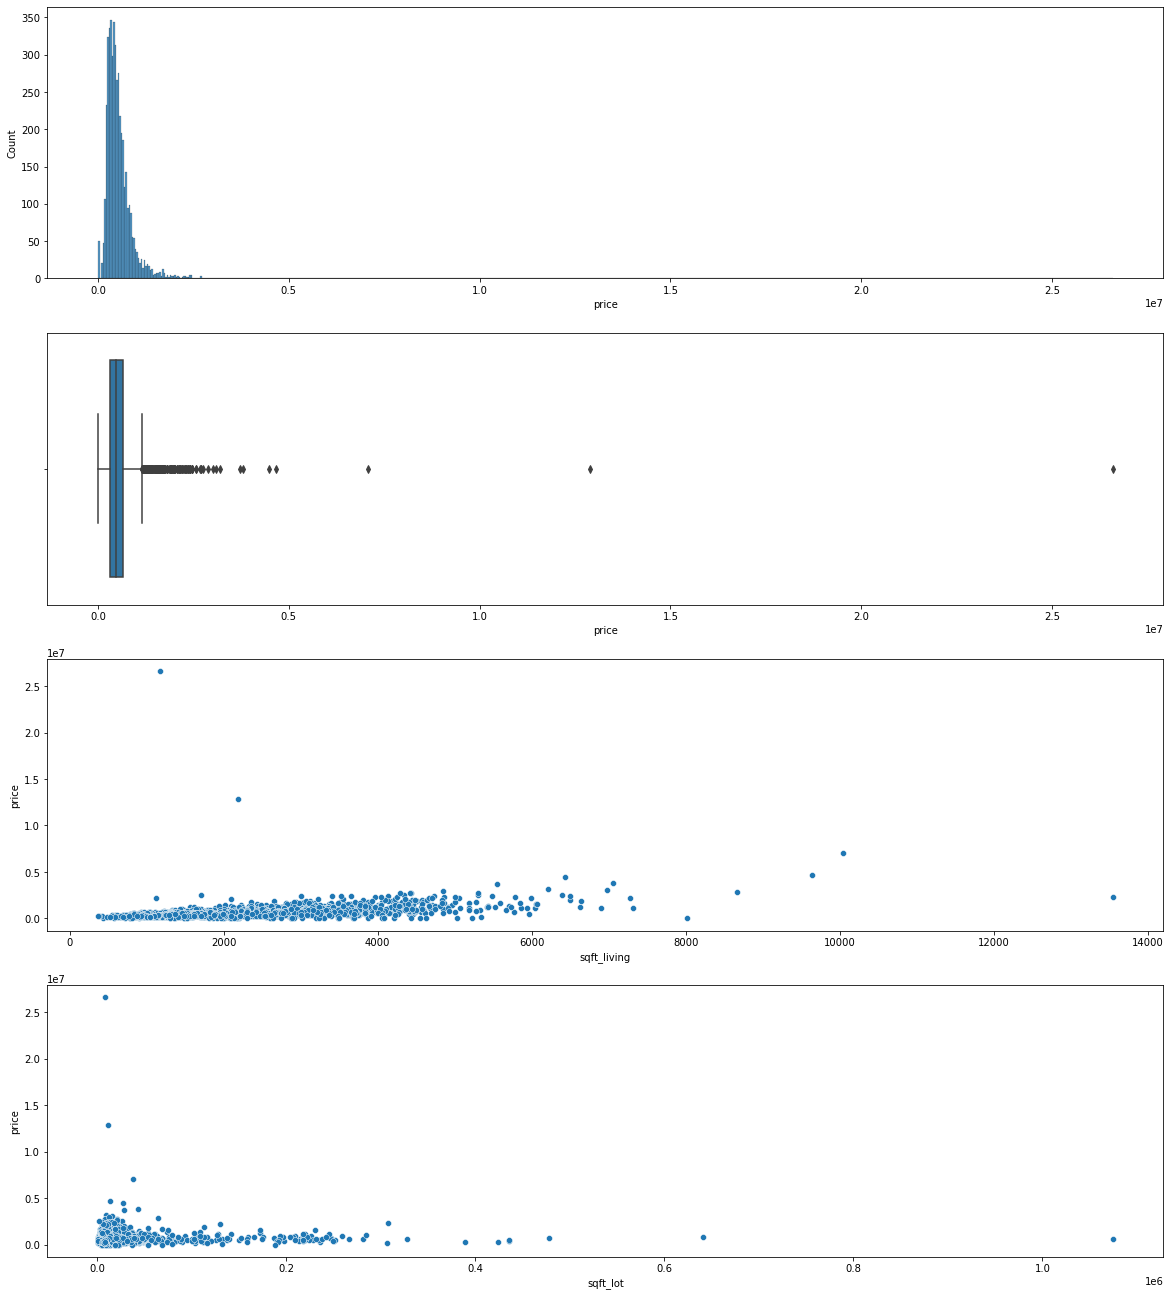

In [5]:
#Histogram of prices
#Box plot of prices
#Scatterplot of prices vs square footage
#Scatterplot of prices vs lot size

f,ax = plt.subplots(4,1,figsize=(20,23))
sns.histplot(x = 'price',data=data, ax=ax[0])
sns.boxplot(x = 'price',data=data, ax=ax[1])
sns.scatterplot(x= 'sqft_living',y = 'price',data=data, ax=ax[2])
sns.scatterplot(x= 'sqft_lot',y = 'price',data=data, ax=ax[3])

In [6]:
#DATA CLEANING

data['bedrooms'] = data['bedrooms'].round().astype(int)
data['bathrooms'] = data['bathrooms'].round().astype(int)
data['price'] = data['price'].round(decimals=2)

In [7]:
#Change statezip data type to integer 

data['statezip'] = data['statezip'].replace("WA 9", "9",regex=True).astype(int)

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,2,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,USA
2,2014-05-02 00:00:00,342000.0,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,USA
3,2014-05-02 00:00:00,420000.0,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,USA
4,2014-05-02 00:00:00,550000.0,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052,USA


In [8]:
#Houses where price is 0

data.loc[(data['price'] == 0)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3,2,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,98001,USA
4356,2014-05-05 00:00:00,0.0,4,3,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,98199,USA
4357,2014-05-05 00:00:00,0.0,6,3,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,98146,USA
4358,2014-05-06 00:00:00,0.0,5,4,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,98075,USA
4361,2014-05-07 00:00:00,0.0,5,2,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,98166,USA


In [9]:
#Houses with 0 bedrooms

data.loc[(data['bedrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,2014-06-24 00:00:00,1295648.0,0,0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [10]:
#Houses with 0 bathrooms

data.loc[(data['bathrooms'] == 0)].sort_values(by=['price'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,2014-06-24 00:00:00,1295648.0,0,0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [11]:
#Check the outliers (most expensive)

data.sort_values(by=['price'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3,2,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
4346,2014-06-23 00:00:00,12899000.0,3,2,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
2286,2014-06-11 00:00:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2761,2014-06-18 00:00:00,4489000.0,4,3,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,98004,USA


In [12]:
#Check the outliers (cheapest)

data.loc[(data['price'] > 0)].sort_values(by=['price']).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4351,2014-05-06 00:00:00,7800.0,2,1,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,98168,USA
1219,2014-05-23 00:00:00,80000.0,1,1,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,98014,USA
1587,2014-05-29 00:00:00,83000.0,2,1,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,98168,USA
4407,2014-05-20 00:00:00,83300.0,3,2,1490,7770,1.0,0,0,4,1490,0,1990,0,26017 189th Ave SE,Covington,98042,USA
4415,2014-05-23 00:00:00,83300.0,3,2,1370,78408,1.0,0,0,5,1370,0,1964,0,24007 196th Ave SE,Covington,98042,USA


In [13]:
#Check the outliers (widest sqft_living)

data.sort_values(by=['sqft_living'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2014-05-05 00:00:00,2280000.0,7,8,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,98053,USA
2286,2014-06-11 00:00:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2328,2014-06-11 00:00:00,2888000.0,5,6,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,98177,USA
4575,2014-07-02 00:00:00,0.0,5,6,8020,21738,2.0,0,0,3,8020,0,2001,0,2 Crescent Key,Bellevue,98006,USA


In [14]:
#Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0

missing = data.loc[(data['price'] == 0)].append(data.loc[(data['bathrooms'] == 0)])

In [15]:
# Create list that contains index of error datapoint

missing_index_list = missing.reset_index()['index'].to_list()

In [16]:
# Insert index of outliers

missing_index_list.extend([122,1078,2480,4346,4350,4351])

In [17]:
# Sort the list so it won't change the index

missing_index_list.sort(reverse = True)

In [18]:
# Drop error datapoint

data = data.drop(missing_index_list,axis=0)

In [19]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,2,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,USA
2,2014-05-02 00:00:00,342000.0,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,USA
3,2014-05-02 00:00:00,420000.0,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,USA
4,2014-05-02 00:00:00,550000.0,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052,USA


In [20]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.67,3,2,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,98133,USA
4596,2014-07-09 00:00:00,534333.33,3,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,98007,USA
4597,2014-07-09 00:00:00,416904.17,3,2,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,98059,USA
4598,2014-07-10 00:00:00,203400.00,4,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,98178,USA
4599,2014-07-10 00:00:00,220600.00,3,2,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,98042,USA


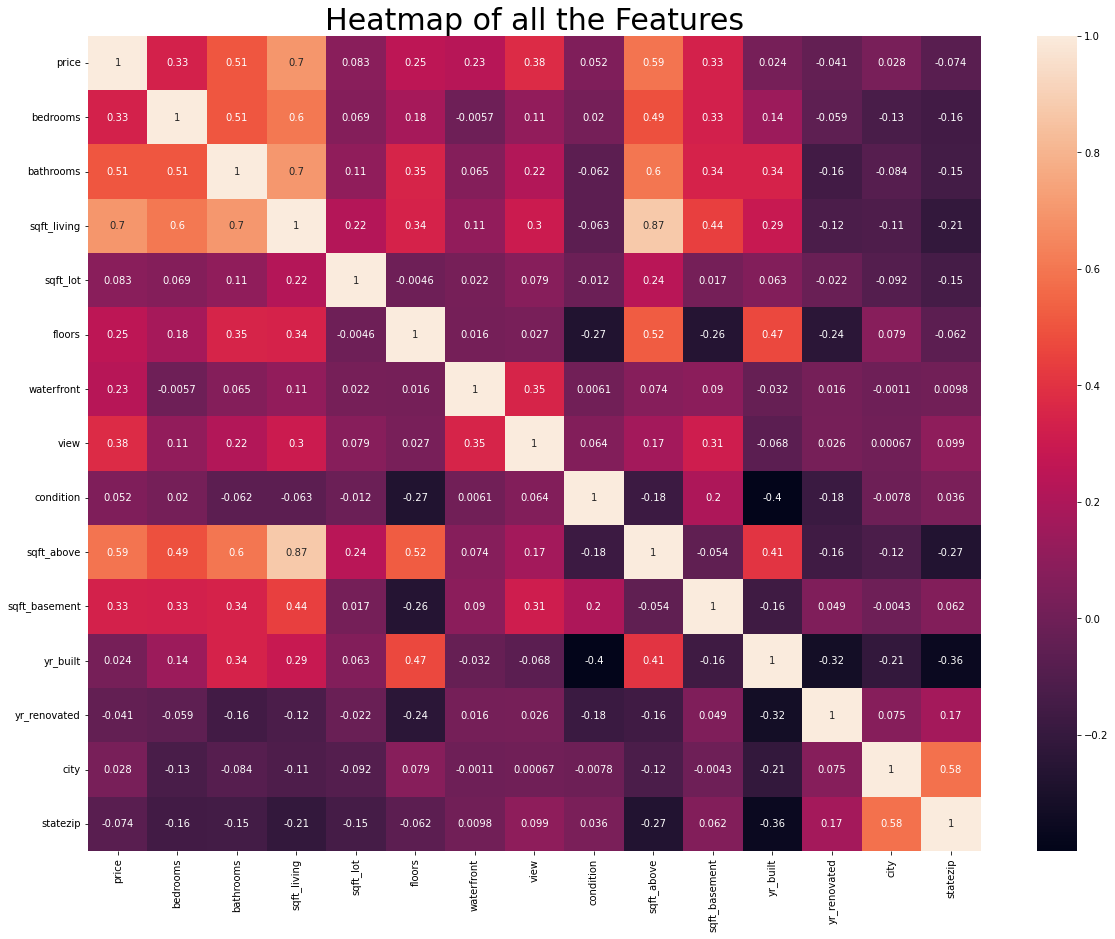

In [21]:
#Correlation Check

features = data.drop(['date','street','country'],axis=1)
encoder = LabelEncoder()
features['city'] = encoder.fit_transform(features['city'])

plt.figure(figsize=(20,15))
sns.heatmap(features.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 30);
plt.show()

In [22]:
#Split data to X for variable input, and y for target class

y = features['price']
X = features.drop(['price','yr_renovated','statezip'],axis=1)

In [23]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
##### LINEAR REGRESSION MODEL #####